In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
window_size = 5
min_disp = -39
num_disp = 144

In [3]:
def get_disparity(img_l, img_r, stereo):
    return stereo.compute(img_l,img_r).astype(np.float32)/64.0

In [4]:
left = os.listdir('../data/img2')
right = os.listdir('../data/img3')

left = np.sort(left)
right = np.sort(right)

data = []

for i in range(len(left)):
    data.append(('../data/img2/'+left[i],'../data/img3/'+right[i]))

In [5]:
def show_images(img1, img2, img3=None, disparity=False, debug=False, num_disparity=0, val=0, uniquenessRatio=0):

    if not disparity:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle(f"{i}th Stereo Pair")
        ax1.imshow(img1)
        ax2.imshow(img2)
        plt.show()
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,2.5))
        
        if debug:
            fig.suptitle(f"Stereo Pair #{i} with {num_disparity} num_disparity, {val} blockSize, {uniquenessRatio} uniquenessRatio")
        else:
            fig.suptitle(f"Stereo Pair #{i}")
        
        ax1.imshow(img1)
        ax2.imshow(img3, cmap="gray")
        ax3.imshow(img2)
        plt.show()

../data/img2/0000000460.png ../data/img3/0000000460.png 0


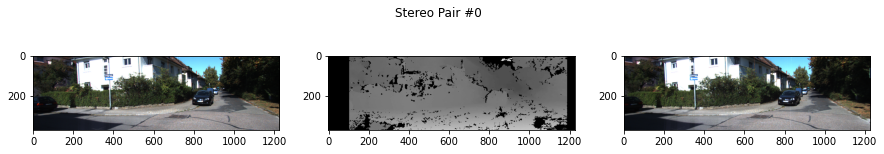

../data/img2/0000000461.png ../data/img3/0000000461.png 1


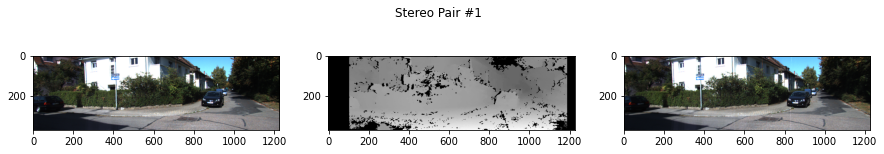

../data/img2/0000000462.png ../data/img3/0000000462.png 2


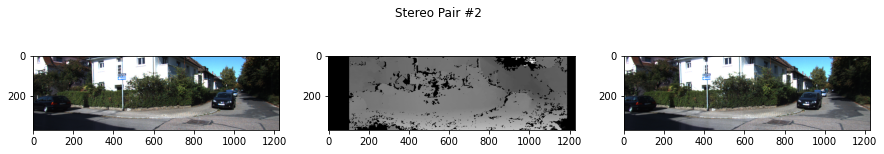

../data/img2/0000000463.png ../data/img3/0000000463.png 3


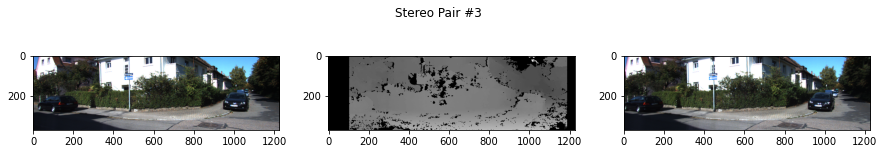

../data/img2/0000000464.png ../data/img3/0000000464.png 4


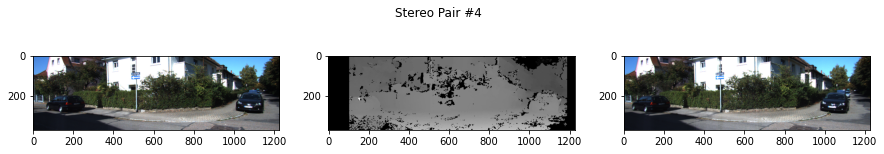

../data/img2/0000000465.png ../data/img3/0000000465.png 5


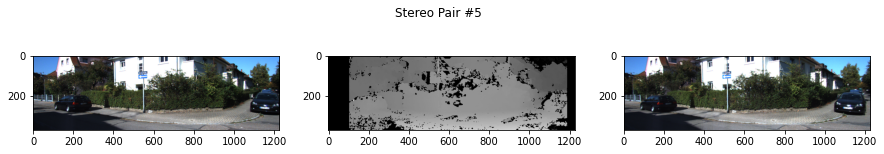

../data/img2/0000000466.png ../data/img3/0000000466.png 6


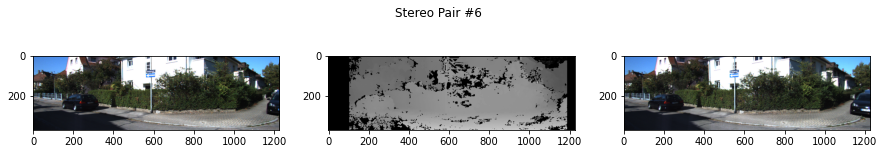

../data/img2/0000000467.png ../data/img3/0000000467.png 7


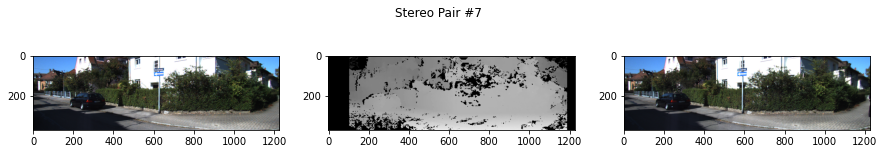

../data/img2/0000000468.png ../data/img3/0000000468.png 8


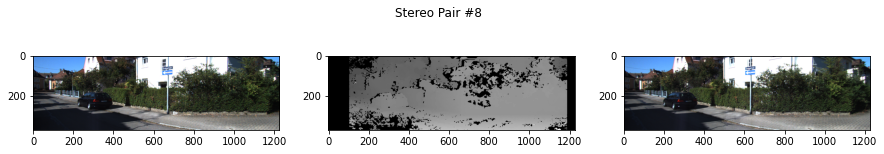

../data/img2/0000000469.png ../data/img3/0000000469.png 9


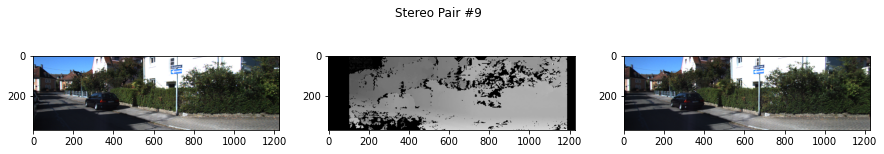

../data/img2/0000000470.png ../data/img3/0000000470.png 10


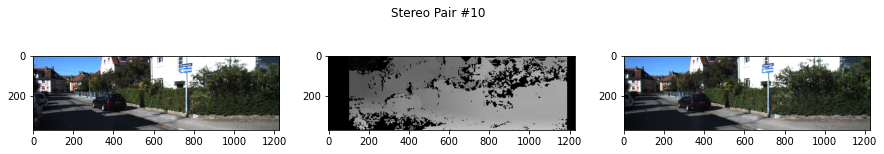

../data/img2/0000000471.png ../data/img3/0000000471.png 11


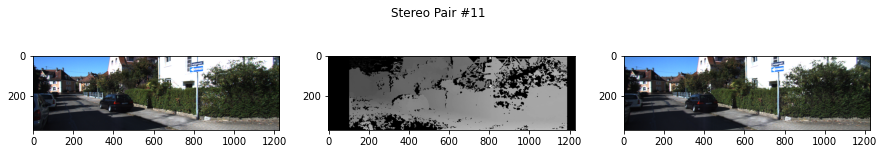

../data/img2/0000000472.png ../data/img3/0000000472.png 12


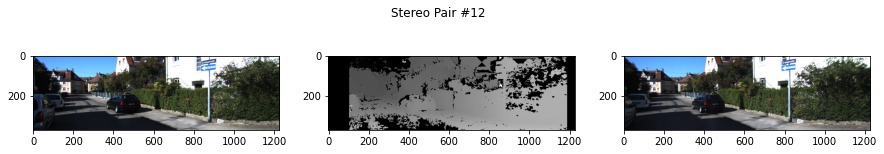

../data/img2/0000000473.png ../data/img3/0000000473.png 13


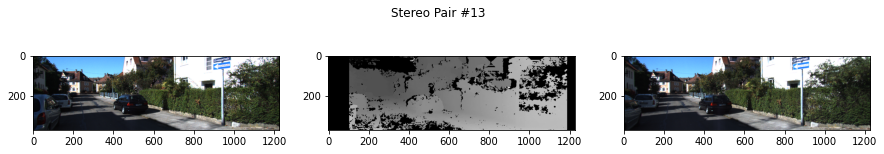

../data/img2/0000000474.png ../data/img3/0000000474.png 14


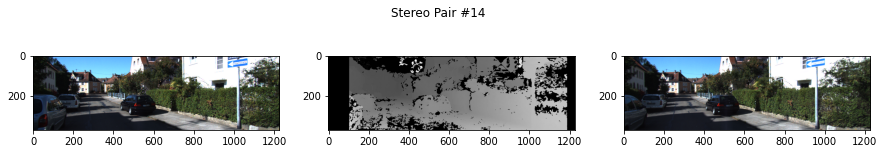

../data/img2/0000000475.png ../data/img3/0000000475.png 15


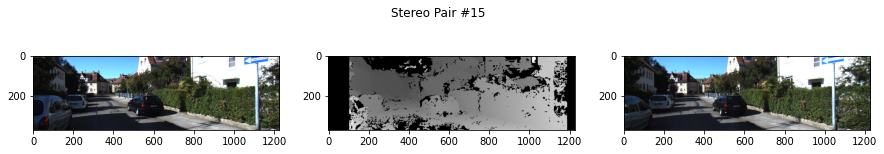

../data/img2/0000000476.png ../data/img3/0000000476.png 16


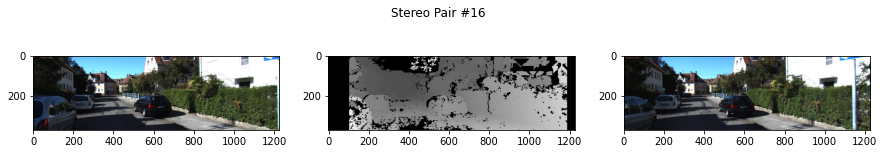

../data/img2/0000000477.png ../data/img3/0000000477.png 17


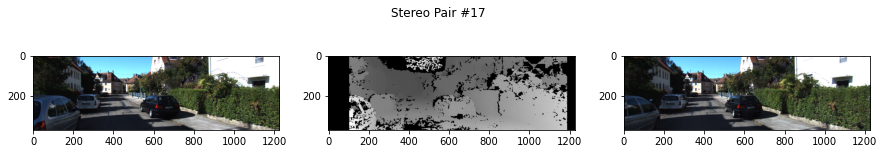

../data/img2/0000000478.png ../data/img3/0000000478.png 18


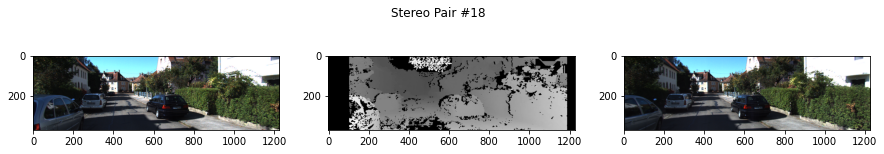

../data/img2/0000000479.png ../data/img3/0000000479.png 19


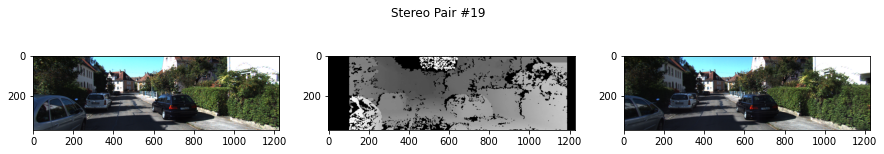

../data/img2/0000000480.png ../data/img3/0000000480.png 20


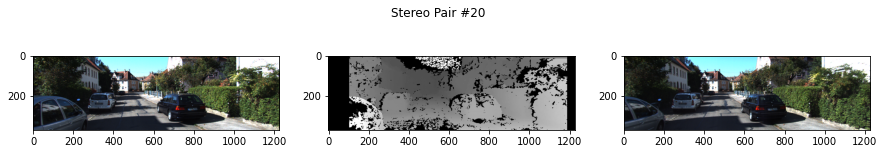

In [6]:
disparities = []

for i, (imgL, imgR) in enumerate(data):
    print(imgL, imgR, i)
    img1 = cv2.imread(imgL)
    img2 = cv2.imread(imgR)
    
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    
    stereo = cv2.StereoSGBM_create(
           minDisparity = min_disp,
           numDisparities = num_disp,
           blockSize = 5,
           P1 = 8*3*window_size**2,
           P2 = 32*3*window_size**2,
           disp12MaxDiff = 1,
           uniquenessRatio = 10,
           speckleWindowSize = 100,
           speckleRange = 32,
           preFilterCap=63
       )

    disparity = (get_disparity(img1, img2, stereo) - min_disp)/num_disp
    disparities.append(disparity)
    
    show_images(img1, img2, disparity, True, False)

In [7]:
K = np.array([[7.070912e+02, 0.000000e+00, 6.018873e+02,],[0.000000e+00, 7.070912e+02, 1.831104e+02],[0.000000e+00, 0.000000e+00, 1.000000e+00]])
baseline = 0.53790448812

In [8]:
def calculate_Q(K,baseline,img):
    f = K[0][0]
    h, w = img.shape
    Q = np.zeros((4,4), dtype='float32')
    Q[0,0], Q[1,1] = 1, -1
    Q[0,-1], Q[1,-1], Q[2,-1] = -0.5*w, 0.5*h, f
    Q[-1,2] = 1/baseline
    return Q

In [9]:
points3d = []

for i in range(len(disparities)):
    print(i)
    disp_img = disparities[i]
    Q = calculate_Q(K,baseline,disp_img)

    points = cv2.reprojectImageTo3D(disp_img, Q)
    print(points)
    
    imgL = cv2.imread(data[i][0])
    print(data[i][0])
    imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
    
    points = points.reshape(-1, 3)
    colors = imgL.reshape(-1, 3) / 255
    
    points3d.append(points)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    
    o3d.visualization.draw_geometries([pcd])

0
[[[-1637.307     494.13016  1888.6221 ]
  [-1634.636     494.13016  1888.6221 ]
  [-1631.9651    494.13016  1888.6221 ]
  ...
  [ 1629.2941    494.13016  1888.6221 ]
  [ 1631.9651    494.13016  1888.6221 ]
  [ 1634.636     494.13016  1888.6221 ]]

 [[-1637.307     491.4592   1888.6221 ]
  [-1634.636     491.4592   1888.6221 ]
  [-1631.9651    491.4592   1888.6221 ]
  ...
  [ 1629.2941    491.4592   1888.6221 ]
  [ 1631.9651    491.4592   1888.6221 ]
  [ 1634.636     491.4592   1888.6221 ]]

 [[-1637.307     488.7882   1888.6221 ]
  [-1634.636     488.7882   1888.6221 ]
  [-1631.9651    488.7882   1888.6221 ]
  ...
  [ 1629.2941    488.7882   1888.6221 ]
  [ 1631.9651    488.7882   1888.6221 ]
  [ 1634.636     488.7882   1888.6221 ]]

 ...

 [[-1637.307    -486.11725  1888.6221 ]
  [-1634.636    -486.11725  1888.6221 ]
  [-1631.9651   -486.11725  1888.6221 ]
  ...
  [ 1629.2941   -486.11725  1888.6221 ]
  [ 1631.9651   -486.11725  1888.6221 ]
  [ 1634.636    -486.11725  1888.6221 ]]



6
[[[-1637.307     494.13016  1888.6221 ]
  [-1634.636     494.13016  1888.6221 ]
  [-1631.9651    494.13016  1888.6221 ]
  ...
  [ 1629.2941    494.13016  1888.6221 ]
  [ 1631.9651    494.13016  1888.6221 ]
  [ 1634.636     494.13016  1888.6221 ]]

 [[-1637.307     491.4592   1888.6221 ]
  [-1634.636     491.4592   1888.6221 ]
  [-1631.9651    491.4592   1888.6221 ]
  ...
  [ 1629.2941    491.4592   1888.6221 ]
  [ 1631.9651    491.4592   1888.6221 ]
  [ 1634.636     491.4592   1888.6221 ]]

 [[-1637.307     488.7882   1888.6221 ]
  [-1634.636     488.7882   1888.6221 ]
  [-1631.9651    488.7882   1888.6221 ]
  ...
  [ 1629.2941    488.7882   1888.6221 ]
  [ 1631.9651    488.7882   1888.6221 ]
  [ 1634.636     488.7882   1888.6221 ]]

 ...

 [[-1637.307    -486.11725  1888.6221 ]
  [-1634.636    -486.11725  1888.6221 ]
  [-1631.9651   -486.11725  1888.6221 ]
  ...
  [ 1629.2941   -486.11725  1888.6221 ]
  [ 1631.9651   -486.11725  1888.6221 ]
  [ 1634.636    -486.11725  1888.6221 ]]



12
[[[-1637.307     494.13016  1888.6221 ]
  [-1634.636     494.13016  1888.6221 ]
  [-1631.9651    494.13016  1888.6221 ]
  ...
  [ 1629.2941    494.13016  1888.6221 ]
  [ 1631.9651    494.13016  1888.6221 ]
  [ 1634.636     494.13016  1888.6221 ]]

 [[-1637.307     491.4592   1888.6221 ]
  [-1634.636     491.4592   1888.6221 ]
  [-1631.9651    491.4592   1888.6221 ]
  ...
  [ 1629.2941    491.4592   1888.6221 ]
  [ 1631.9651    491.4592   1888.6221 ]
  [ 1634.636     491.4592   1888.6221 ]]

 [[-1637.307     488.7882   1888.6221 ]
  [-1634.636     488.7882   1888.6221 ]
  [-1631.9651    488.7882   1888.6221 ]
  ...
  [ 1629.2941    488.7882   1888.6221 ]
  [ 1631.9651    488.7882   1888.6221 ]
  [ 1634.636     488.7882   1888.6221 ]]

 ...

 [[-1637.307    -486.11725  1888.6221 ]
  [-1634.636    -486.11725  1888.6221 ]
  [-1631.9651   -486.11725  1888.6221 ]
  ...
  [ 1629.2941   -486.11725  1888.6221 ]
  [ 1631.9651   -486.11725  1888.6221 ]
  [ 1634.636    -486.11725  1888.6221 ]]


18
[[[-1637.307     494.13016  1888.6221 ]
  [-1634.636     494.13016  1888.6221 ]
  [-1631.9651    494.13016  1888.6221 ]
  ...
  [ 1629.2941    494.13016  1888.6221 ]
  [ 1631.9651    494.13016  1888.6221 ]
  [ 1634.636     494.13016  1888.6221 ]]

 [[-1637.307     491.4592   1888.6221 ]
  [-1634.636     491.4592   1888.6221 ]
  [-1631.9651    491.4592   1888.6221 ]
  ...
  [ 1629.2941    491.4592   1888.6221 ]
  [ 1631.9651    491.4592   1888.6221 ]
  [ 1634.636     491.4592   1888.6221 ]]

 [[-1637.307     488.7882   1888.6221 ]
  [-1634.636     488.7882   1888.6221 ]
  [-1631.9651    488.7882   1888.6221 ]
  ...
  [ 1629.2941    488.7882   1888.6221 ]
  [ 1631.9651    488.7882   1888.6221 ]
  [ 1634.636     488.7882   1888.6221 ]]

 ...

 [[-1637.307    -486.11725  1888.6221 ]
  [-1634.636    -486.11725  1888.6221 ]
  [-1631.9651   -486.11725  1888.6221 ]
  ...
  [ 1629.2941   -486.11725  1888.6221 ]
  [ 1631.9651   -486.11725  1888.6221 ]
  [ 1634.636    -486.11725  1888.6221 ]]


In [10]:
file1 = open('../data/poses.txt', 'r')
Lines = file1.readlines()
pcds = []

pcd_pts = []
pcd_color = []

for i in range(len(points3d)):
    
    mat = np.array([float(numeric_string) for numeric_string in Lines[i].split(' ')])
    mat = np.reshape(mat,(3,4))
    
    imgL = cv2.imread(data[i][0])
    imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
    
    imgL_cut = imgL
    colors = imgL_cut.reshape(-1, 3) / 255
    
    pcd = o3d.geometry.PointCloud()
    
    temp = np.ones((points3d[i].shape[0],points3d[i].shape[1]+1))
    temp[:,:3] = points3d[i]
    
    transform = temp@mat.T
    
    pcd_pts.append(transform)
    pcd_color.append(colors)
    
    pcd.points = o3d.utility.Vector3dVector(transform)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    pcds.append(pcd)

o3d.visualization.draw_geometries(pcds)

In [11]:
K = [[7.070912e+07, 0.000000e+00, 6.018873e+02],
     [0.000000e+00, 7.070912e+02, 1.831104e+02],
     [0.000000e+00, 0.000000e+00, 1.000000e+00]]

In [12]:
def initialize(K):
    
    mu, sigma = 0, 0.1
    R = np.random.normal(mu, sigma, (3, 3))
    t = np.random.normal(mu, sigma, (3, 1))

    P = K @ np.hstack((R,t))
    
    return P, R, t

P, R, t = initialize(K)

In [13]:
def make_homogeneous(points):
    
    points_3d = []
    points_2d = []
    
    for i in random.sample(range(0, points.shape[0]), 100):
        pnt = P @ np.hstack((points[i], [1]))
        
        points_3d.append(np.hstack((points[i], [1])))
        points_2d.append(pnt)
    
    return np.array(points_3d), np.array(points_2d)

In [14]:
def residual(points_2d, points_3d, P):
    
    res = []
    P = P.reshape((3,4))

    for i in range(points_2d.shape[0]):
        proj_point = P @ points_3d[i]
        norm = (points_2d[i] - proj_point)**2
        e = np.sum(norm)
        res.append(e)
        
    return np.array(res)

In [15]:
def jacobian(points_2d, points_3d, P):
    
    J = np.zeros((points_2d.shape[0], 12))
    
    for i in range(points_2d.shape[0]):
        x1, x2, x3 = points_2d[i]
        X1, X2, X3, X4 = points_3d[i]

        J[i][0]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X1)
        J[i][1]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X2)
        J[i][2]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X3)
        J[i][3]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X4)

        J[i][4]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X1)
        J[i][5]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X2)
        J[i][6]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X3)
        J[i][7]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X4)

        J[i][8]  = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X1)
        J[i][9]  = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X2)
        J[i][10] = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X3)
        J[i][11] = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X4)
        
    return J

In [16]:
def get_error(points_2d, points_3d, proj):
    
    e = residual(points_2d, points_3d, proj)
    err = np.sum(e)
    return err

In [17]:
def gauss_newton(points_2d, points_3d, proj):
    
    iterations = 0
    err = [get_error(points_2d, points_3d, proj)]

    while True:
        iterations += 1
        
        J = jacobian(points_2d, points_3d, proj)
        e = residual(points_2d, points_3d, proj)

        del_proj = - np.linalg.pinv(J.T @ J) @ J.T @ e     
        proj += del_proj.reshape((12,1))
        
        err_val = get_error(points_2d, points_3d, proj)
        err.append(err_val)
        
        if err_val < 1e-3:
            print("Iteration of Convergence:" + str(iterations))
            break
    
    return err

In [18]:
def residual(points_2d, points_3d, P):
    
    res = []
    P = P.reshape((3,4))

    for i in range(points_2d.shape[0]):
        proj_point = P @ points_3d[i]
        norm = (points_2d[i] - proj_point)
        e = np.sum(norm)
        res.append(e)
        
    return np.array(res)

def jacobian(points_2d, points_3d, P):
    
    J = np.zeros((points_2d.shape[0], 12))
    
    for i in range(points_2d.shape[0]):
        x1, x2, x3 = points_2d[i]
        X1, X2, X3, X4 = points_3d[i]

        J[i][0]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X1)
        J[i][1]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X2)
        J[i][2]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X3)
        J[i][3]  = 2*(x1 - P[0]*X1 - P[1]*X2 - P[2]*X3  - P[3]*X4)* (-X4)

        J[i][4]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X1)
        J[i][5]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X2)
        J[i][6]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X3)
        J[i][7]  = 2*(x2 - P[4]*X1 - P[5]*X2 - P[6]*X3  - P[7]*X4)* (-X4)

        J[i][8]  = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X1)
        J[i][9]  = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X2)
        J[i][10] = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X3)
        J[i][11] = 2*(x3 - P[8]*X1 - P[9]*X2 - P[10]*X3 - P[11]*X4)* (-X4)
        
    return J

def get_error(points_2d, points_3d, proj):
    
    e = residual(points_2d, points_3d, proj)
    err = np.sum(e)
    return err

def gauss_newton(points_2d, points_3d, proj):
    
    iterations = 0
    err = [get_error(points_2d, points_3d, proj)]

    while True:
        iterations += 1
        
        J = jacobian(points_2d, points_3d, proj)
        
        e = residual(points_2d, points_3d, proj)

        del_proj = - np.linalg.pinv(J.T @ J) @ J.T @ e    
        proj += del_proj
        
        err_val = get_error(points_2d, points_3d, proj)
        err.append(err_val)
        
        if err_val < 1e-3:
            break
    
    return proj

In [19]:
def get_com(p):
    return np.sum(p,axis=0)/p.shape[0]

In [20]:
def err_func(p,q):
    err = np.linalg.norm(q-p)
    return err

In [21]:
def procrustes_alignment(p, q):

    c1 = get_com(p)
    c2 = get_com(q)

    p_com = np.zeros_like(p)
    q_com = np.zeros_like(q)

    for i in range(p.shape[0]):
        p_com[i] = p[i] - c1
        q_com[i] = q[i] - c2

    W = np.matmul(p_com.T, q_com)

    u, s, vh = np.linalg.svd(W)

    b = np.eye(3)
    b[2,2] = (np.linalg.det(u)*np.linalg.det(vh))
    
#     R = np.matmul(np.matmul(u,b),vh)
    R = np.matmul(np.matmul(vh.T,b),u.T)

    res = np.zeros_like(p)

    t = c2 - np.matmul(R,c1)
    
    for i in range(p.shape[0]):
        res[i] = np.matmul(R,p[i]) + t
    
    return res,R,t

In [ ]:
pcds = []
T = np.eye(4)

for i in range(len(data)-1):
    
    sift =cv2.SIFT_create()
    disp_img1 = (disparities[i]-np.min(disparities[i]))
    disp_img1 /= np.max(disp_img1)
    disp_img1 = np.floor(disp_img1*255).astype('uint8')
    disp_img2 = (disparities[i+1]-np.min(disparities[i+1]))
    disp_img2 /= np.max(disp_img2)
    disp_img2 = np.floor(disp_img2*255).astype('uint8')
    
    kp1, des1 = sift.detectAndCompute(disp_img1,None)
    kp2, des2 = sift.detectAndCompute(disp_img2,None)
    
    match = cv2.BFMatcher()
    matches = match.knnMatch(des1,des2,k=2)
    
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append(m)

    MIN_MATCH_COUNT = 100
    M = None
    src_pts = None
    dst_pts = None
    
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ])
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ])
    
    src_pts_3d = []
    dst_pts_3d = []
    
    for s in src_pts:
        src_pts_3d.append(points3d[i][int(s[1]*disp_img1.shape[1] + s[0])])
    
    for s in dst_pts:
        dst_pts_3d.append(points3d[i+1][int(s[1]*disp_img1.shape[1] + s[0])])
        
    _,R,t = procrustes_alignment(np.array(src_pts_3d), np.array(dst_pts_3d))
    
    T1 = np.eye(4)
    T1[:3,:3] = R
    T1[:3,-1] = t
    T = T@T1
    
    P = K@T[:3,:]
    
    dst_pts_3d = np.array(dst_pts_3d)
    src_pts_3d = np.array(src_pts_3d)
    
    dst_pts_3d_h = np.ones((dst_pts_3d.shape[0],dst_pts_3d.shape[1]+1))
    src_pts_3d_h = np.ones((src_pts_3d.shape[0],src_pts_3d.shape[1]+1))
    
    dst_pts_3d_h[:,:3] = dst_pts_3d 
    src_pts_3d_h[:,:3] = src_pts_3d 
    
    
    dst_pts = np.array(dst_pts)
    src_pts = np.array(src_pts)
    
    dst_pts_h = np.ones((dst_pts.shape[0],dst_pts.shape[1]+1))
    src_pts_h = np.ones((src_pts.shape[0],src_pts.shape[1]+1))
    
    dst_pts_3d_h[:,:3] = dst_pts_3d 
    src_pts_3d_h[:,:3] = src_pts_3d 
    
    P = gauss_newton(dst_pts_h, dst_pts_3d_h, P.ravel())
    
    print(P)

[ 5.82079391e+06  6.73040740e+07 -2.08820412e+07  2.97915210e+10
 -5.75910605e+02 -8.69458986e+01 -4.40766133e+02  8.33837374e+05
 -7.87662244e-01  2.43643454e-01  5.65760815e-01  6.04931855e+02]
[-2.91122937e+07  3.69286088e+07  5.28065538e+07 -7.14542529e+10
 -6.61800034e+02 -2.35522880e+02 -2.00142611e+02  5.01650027e+05
 -1.32593326e-01 -8.45100953e-01  5.17762125e-01  6.80282257e+02]
[ 3.86519798e+07 -4.34086289e+07 -4.02678013e+07  5.44307512e+10
  6.10968411e+02  2.69297163e+02  2.96148715e+02 -1.21636676e+05
  1.71999432e-01 -5.83292551e-01  7.93869049e-01  3.07896345e+02]
